This iPython notebook is a very basic example of how to read in and manipulate data using the [GWpy](https://github.com/gwpy/gwpysoft "GWpy") software package. If you have LIGO.org authentication, instructions on how to run this iPython notebook from a LIGO data grid computing cluster can be found on this [wiki](https://wiki.ligo.org/DetChar/PythonNotebook "wiki").

The first step is to import the GWpy TimeSeries module and read in data. This example uses publicly available data sets, so anyone can install GWpy and run this.

In [1]:
# Inline matplotlib only needed for iPython notebooks for inline image rendering
# If running this code in a script, matplotlib inline can be commented out or omitted
%matplotlib inline
from gwpy.timeseries import TimeSeries

In [2]:
data = TimeSeries.fetch_open_data('L1', 1126259446, 1126259478)
# on a LIGO Data Grid cluster, you can use the following to grab data (leave off frametype if using NDS2):
# data = TimeSeries.get('L1:GDS-CALIB_STRAIN', 1126259446, 1126259478, frametype='L1_HOFT_C00')

For our first example, we'll plot a simple time series of the data that we read in.

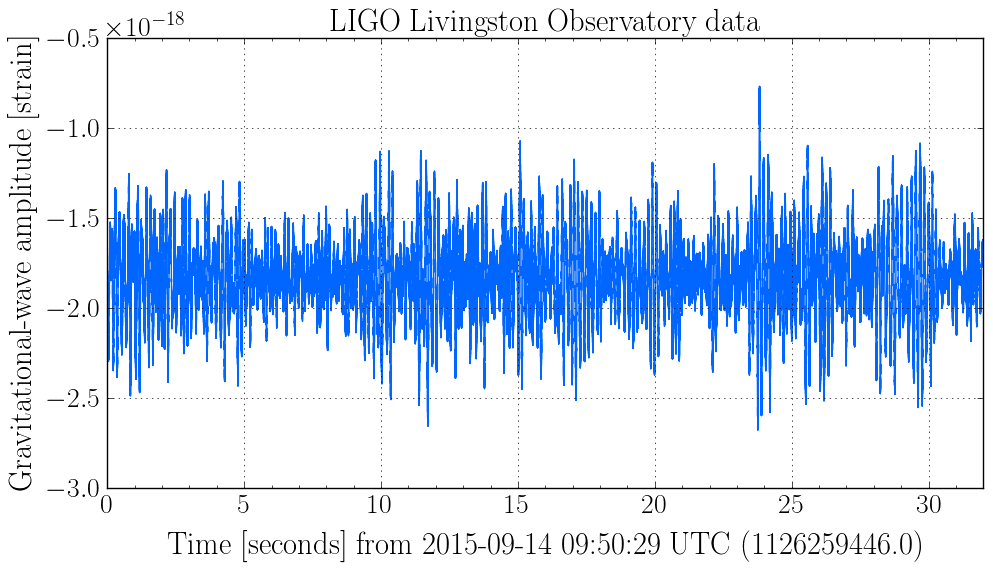

In [3]:
ts = data.plot()     # Generate a time series plot from the data
ax = ts.gca()        # Grab the current axes of the plot
ax.set_ylabel('Gravitational-wave amplitude [strain]')
ax.set_title('LIGO Livingston Observatory data')
# to save this figure:
# ts.savefig('/full/path/to/image.png')

If we want to study the output data in the frequency domain, we can also plot the amplitude spectral density 
(ASD) using the same data object. In this example, we measure the amplitude spectral density by averaging several FFTs of the time-series with 4 seconds per FFT and 2 seconds of overlap between FFTs.

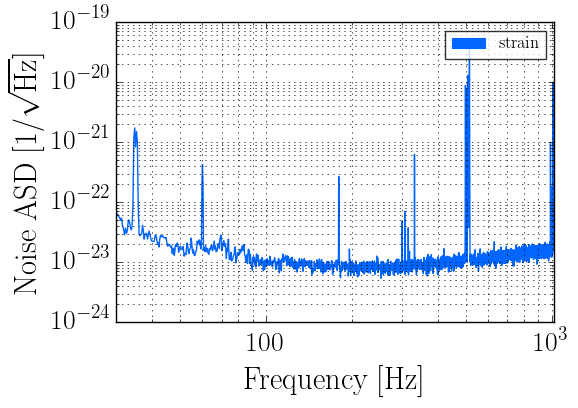

In [4]:
spec = data.asd(4,2)    # Calculate the amplitude spectral density of the data
specfig = spec.plot()   # Plot the ASD
ax = specfig.gca()
ax.set_xlabel('Frequency [Hz]')
ax.set_xlim(30, 1024)
ax.set_ylabel(r'Noise ASD [1/$\sqrt{\mathrm{Hz}}$]')
ax.set_ylim(1e-24, 1e-19)
ax.grid(True, 'both', 'both')
# to save this figure:
# spec.savefig('/full/path/to/image.png')

To tie it all together, we can look at this signal in the time-frequency plane using a spectrogram. Once again we set the length of our FFT and the overlap in seconds. Since `spectrogram2` returns a power spectral density, we take the square root to obtain the amplitude spectral density as a function of time and frequency. We then divide the spectrgram by the average amplitude spectral density in each frequency bin to normalize the plot.

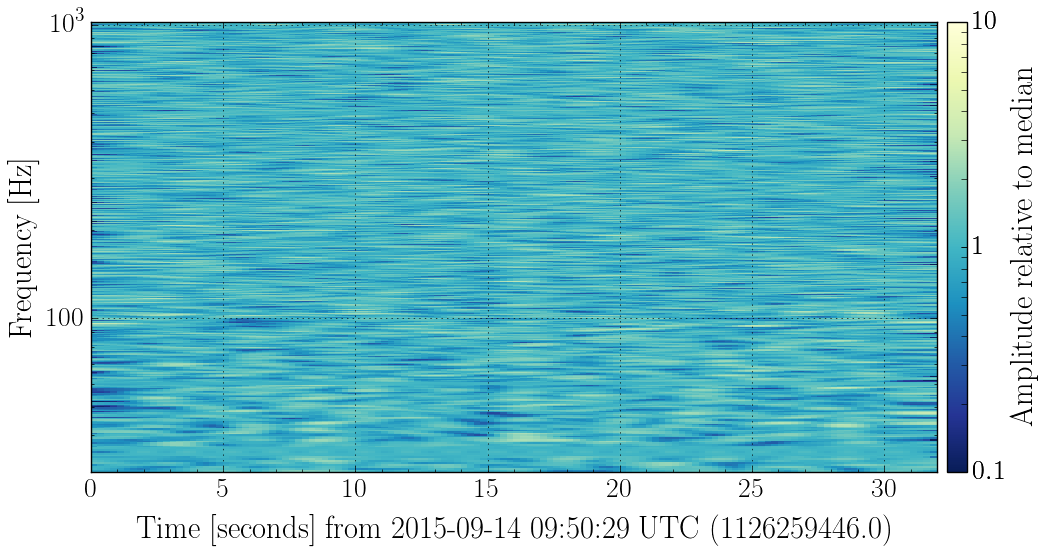

In [5]:
specgram = data.spectrogram2(fftlength=2,overlap=1.75) ** (1/2.)  # Generate a spectrogram from the data
medratio = specgram.ratio('median')                               # Generate a normalized spectrogram
specgramfig = medratio.plot(norm='log', vmin=0.1, vmax=10)        # Plot the normalized spectrogram
specgramfig.set_ylim(30,1024)
specgramfig.set_yscale('log')
specgramfig.add_colorbar(label='Amplitude relative to median',cmap='YlGnBu_r')
# to save this figure:
# specgramfig.savefig('/full/path/to/image.png')